In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


Importing the dataset

In [2]:
df = pd.read_csv("Loan-Prediction.csv")

Intial Data Exploration

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#check for missing values
df.apply(lambda x: sum(x.isnull()), axis =0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#imputing values 
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [11]:
df.apply(lambda x: sum(x.isnull()), axis =0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Check for outliers

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.349681
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


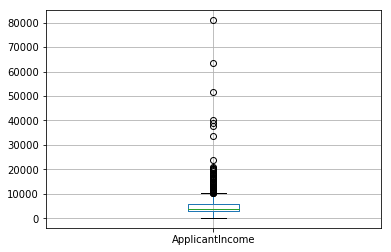

In [13]:
df.boxplot(column='ApplicantIncome')

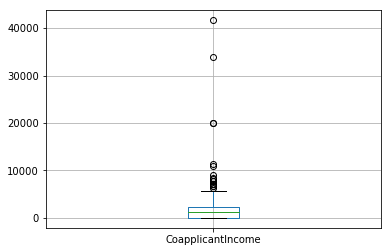

In [7]:
df.boxplot(column='CoapplicantIncome')

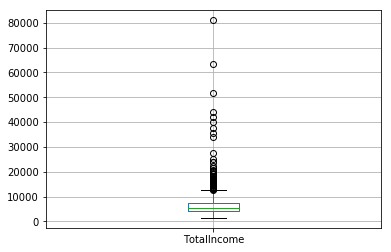

In [21]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.boxplot(column='TotalIncome')

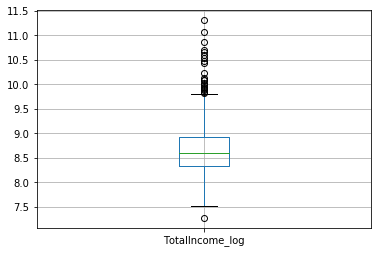

In [23]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df.boxplot(column='TotalIncome_log')

In [ ]:
#grouping applicant income by education

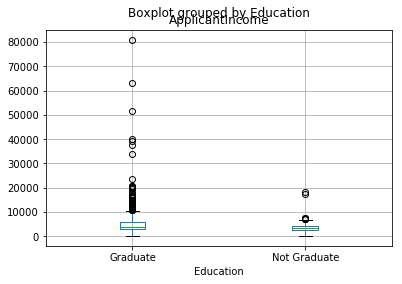

In [8]:
df.boxplot(column='ApplicantIncome', by = 'Education')

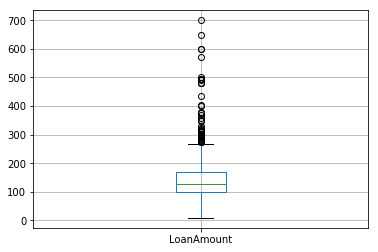

In [9]:
df.boxplot(column='LoanAmount')

In [18]:
freqCredit = df['Credit_History'].value_counts(ascending=True)
probLoan = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Credit History:' )
print(freqCredit)
print ("Probility of getting loan for each Credit History class:")
print(probLoan)

Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64
Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


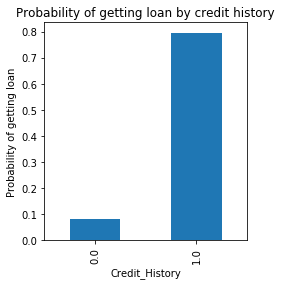

In [31]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(122)
probLoan.plot(kind = 'bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Probability of getting loan')
ax1.set_title("Probability of getting loan by credit history")

In [29]:
freqEdu = df['Education'].value_counts(ascending=True)
probLoanEdu = df.pivot_table(values='Loan_Status',index=['Education'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Education' )
print(freqEdu)
print ("Probility of getting loan based on Education:")
print(probLoanEdu)

Education
Not Graduate    134
Graduate        480
Name: Education, dtype: int64
Probility of getting loan based on Education:
Education
Graduate        0.708333
Not Graduate    0.611940
Name: Loan_Status, dtype: float64


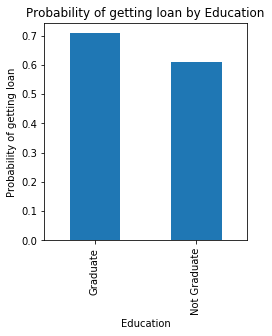

In [33]:
fig = plt.figure(figsize=(8,4))
ax2 = fig.add_subplot(122)
probLoanEdu.plot(kind = 'bar')
ax2.set_xlabel('Education')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by Education")

In [34]:
freqCredit = df['TotalIncome'].value_counts(ascending=True)
probLoanInc = df.pivot_table(values='Loan_Status',index=['TotalIncome'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('otalIncome:' )
print(freqCredit)
print ("Probility of getting loan based on Total Income")
print(probLoanInc)

otalIncome:
3000.000000     1
6782.000000     1
4945.000000     1
8500.000000     1
18165.000000    1
19484.000000    1
4301.000000     1
6598.000000     1
5787.000000     1
8917.000000     1
4897.000000     1
63337.000000    1
8624.000000     1
3934.000000     1
3428.000000     1
1950.000000     1
3946.000000     1
4328.000000     1
2936.120001     1
5080.000000     1
3254.000000     1
5630.000000     1
3612.000000     1
4082.000000     1
5416.000000     1
4941.000000     1
16666.000000    1
6633.000000     1
6211.000000     1
7125.000000     1
               ..
7167.000000     2
4885.000000     2
3875.000000     2
3620.000000     2
5050.000000     2
5746.000000     2
4666.000000     2
2378.000000     2
3900.000000     2
5191.000000     2
7100.000000     2
5703.000000     2
8649.000000     2
6666.000000     2
13650.000000    2
7977.000000     2
8333.000000     2
3418.000000     2
5417.000000     2
3917.000000     2
5000.000000     3
8334.000000     3
6277.000000     3
4166.000000     

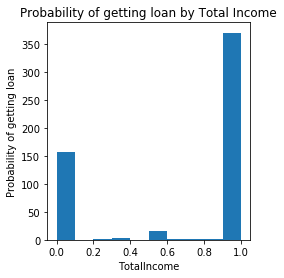

In [40]:
fig = plt.figure(figsize=(8,4))
ax2 = fig.add_subplot(122)
probLoanInc.plot(kind = 'hist')
ax2.set_xlabel('TotalIncome')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by Total Income")